In [ ]:
!pip install --upgrade pip --user

In [ ]:
!pip install citipy


In [1]:
from citipy import citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weather_api_key)

67e9f99841d102b959afd68fe8263f6e


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [5]:
print(cities)



['villacarrillo', 'creston', 'herat', 'tuktoyaktuk', 'faanui', 'atuona', 'nikolskoye', 'santomera', 'bredasdorp', 'sinnamary', 'hilo', 'chuy', 'taolanaro', 'vaini', 'mataura', 'ushuaia', 'butaritari', 'punta arenas', 'rikitea', 'chuguyevka', 'meyungs', 'kamogawa', 'busselton', 'albany', 'port elizabeth', 'hermanus', 'kavieng', 'omsukchan', 'itaueira', 'luganville', 'port alfred', 'price', 'barentsburg', 'luderitz', 'yellowknife', 'lorengau', 'karakol', 'belushya guba', 'kapaa', 'new norfolk', 'qaanaaq', 'zachagansk', 'puerto ayora', 'tsabong', 'hobart', 'sangar', 'rungata', 'arraial do cabo', 'iqaluit', 'sitka', 'avarua', 'namatanai', 'kahului', 'laguna', 'puksoozero', 'tessalit', 'puerto escondido', 'warqla', 'saskylakh', 'dikson', 'abu samrah', 'mahebourg', 'amderma', 'jamestown', 'sao joao da barra', 'iwaki', 'la paz', 'severo-kurilsk', 'avera', 'westport', 'meulaboh', 'the valley', 'georgetown', 'samusu', 'cherskiy', 'hithadhoo', 'ahipara', 'oussouye', 'cumaribo', 'puerto ayacucho'

In [6]:
url="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:

#Empty lists to store API call data and for column use later. 
temp_max=[]
lat=[]
lng=[]
humidity=[]
date=[]
cloudiness=[]
windspeed=[]
country=[]
city_name=[]
counter=1
i=1

In [8]:
print("Begin data retrieval")
print("---------------------")
for city in cities: 
    try:
        response=requests.get(query_url+city).json()
        print(f"Processing record {i} | {city}")

        city_name.append(response['name'])
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])

        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        i=i+1
    except(KeyError): 
        print(f"No data found for {city}")
    
       
    
    

Begin data retrieval
---------------------
Processing record 1 | villacarrillo
Processing record 2 | creston
Processing record 3 | herat
Processing record 4 | tuktoyaktuk
Processing record 5 | faanui
Processing record 6 | atuona
Processing record 7 | nikolskoye
Processing record 8 | santomera
Processing record 9 | bredasdorp
Processing record 10 | sinnamary
Processing record 11 | hilo
Processing record 12 | chuy
Processing record 13 | taolanaro
No data found for taolanaro
Processing record 13 | vaini
Processing record 14 | mataura
Processing record 15 | ushuaia
Processing record 16 | butaritari
Processing record 17 | punta arenas
Processing record 18 | rikitea
Processing record 19 | chuguyevka
Processing record 20 | meyungs
No data found for meyungs
Processing record 20 | kamogawa
Processing record 21 | busselton
Processing record 22 | albany
Processing record 23 | port elizabeth
Processing record 24 | hermanus
Processing record 25 | kavieng
Processing record 26 | omsukchan
Processing 

Processing record 214 | ngukurr
No data found for ngukurr
Processing record 214 | port hardy
Processing record 215 | dingle
Processing record 216 | esperance
Processing record 217 | nanning
Processing record 218 | haverfordwest
Processing record 219 | ozernovskiy
Processing record 220 | los llanos de aridane
Processing record 221 | campbell river
Processing record 222 | marrakesh
Processing record 223 | abu kamal
Processing record 224 | atocha
Processing record 225 | tasbuget
No data found for tasbuget
Processing record 225 | hasaki
Processing record 226 | ust-kamchatsk
No data found for ust-kamchatsk
Processing record 226 | port lincoln
Processing record 227 | carutapera
Processing record 228 | panjakent
Processing record 229 | lebu
Processing record 230 | isakly
Processing record 231 | kunashak
Processing record 232 | arawa
Processing record 233 | mattru
Processing record 234 | tazovskiy
Processing record 235 | bembereke
Processing record 236 | saint george
Processing record 237 | gr

Processing record 433 | preobrazheniye
Processing record 434 | petropavlovsk-kamchatskiy
Processing record 435 | san buenaventura
Processing record 436 | saint-francois
Processing record 437 | sioux lookout
Processing record 438 | ketchikan
Processing record 439 | seoul
Processing record 440 | kalabo
Processing record 441 | keti bandar
Processing record 442 | comarapa
Processing record 443 | olafsvik
Processing record 444 | batagay
Processing record 445 | hay river
Processing record 446 | khrystynivka
Processing record 447 | zinder
Processing record 448 | kichera
Processing record 449 | buraydah
Processing record 450 | bahia honda
Processing record 451 | berlevag
Processing record 452 | jinchengjiang
No data found for jinchengjiang
Processing record 452 | shihezi
Processing record 453 | araouane
Processing record 454 | utiroa
No data found for utiroa
Processing record 454 | along
Processing record 455 | porkhov
Processing record 456 | morinville
Processing record 457 | torquay
Processi

In [10]:
len(windspeed)

580

In [29]:
weather_df = {'Temperature Max': temp_max, 
              'Latitude':lat,
              "Longitude":lng,
              "Humidity":humidity,
              "Date":date,
              "Cloudiness":cloudiness,
              "Windspeed":windspeed, 
             "Country":country, 
             "City":city_name}

In [30]:
weather_df=pd.DataFrame(weather_df)

In [31]:
weather_df=weather_df[["City", "Latitude", "Longitude", "Temperature Max", "Humidity", "Cloudiness", "Windspeed", "Country", "Date"]]

In [32]:
weather_df

,City,Latitude,Longitude,Temperature Max,Humidity,Cloudiness,Windspeed,Country,Date
0,Villacarrillo,38.1156,-3.0848,8.84,96,98,1.88,ES,1612226588
1,Creston,41.0586,-94.3614,-5.00,100,90,2.06,US,1612226588
2,Herat Province,34.5000,62.0000,5.02,66,0,4.47,AF,1612226588
3,Tuktoyaktuk,69.4541,-133.0374,-24.00,84,90,4.12,CA,1612226204
4,Faanui,-16.4833,-151.7500,27.50,76,60,6.56,PF,1612226201
...,...,...,...,...,...,...,...,...,...
575,Narón,43.5167,-8.1528,15.56,82,90,7.20,ES,1612226759
576,Mahon,39.8885,4.2658,13.00,76,0,3.09,ES,1612226759
577,Kärdla,58.9978,22.7492,-0.56,92,100,3.58,EE,1612226759
578,Knysna,-34.0363,23.0471,14.00,77,0,5.14,ZA,1612226760


In [54]:
#Inspecting Data for outliers
weather_df.loc[weather_df["Humidity"]>100, :]

,City,Latitude,Longitude,Temperature Max,Humidity,Cloudiness,Windspeed,Country,Date


In [62]:
weather_df.to_csv('city_data.csv', index=False,)

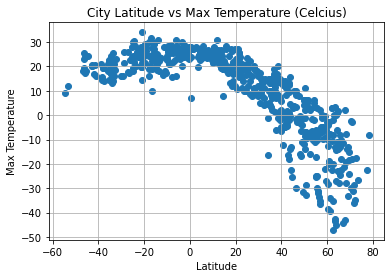

In [69]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature Max"])

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature (Celcius)")
plt.savefig('City Latitude vs Max Temp.png', dpi=300)

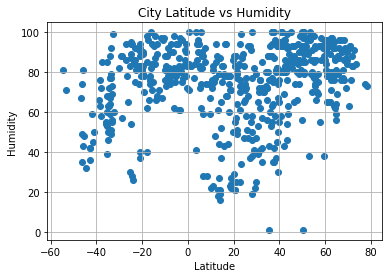

In [70]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")
plt.savefig('City Latitude vs Humidity.png', dpi=300)

Text(0.5, 1.0, 'City Latitude vs Windspeed')

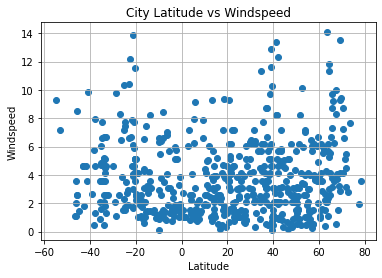

In [66]:
plt.scatter(weather_df["Latitude"],weather_df["Windspeed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("City Latitude vs Windspeed")

Text(0.5, 1.0, 'City Latitude vs Cloudiness')

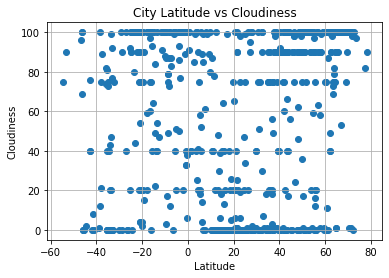

In [68]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")